#Amazon Bestselling Book Analysis
##Problem Scooping
Pada project ini kita akan melakukan analisis penjualan buku pada sebuah Dataset Top 50 buku terlaris Amazon tahun 2009 hingga 2019. Berisi 550 buku, datanya dikategorikan menjadi fiksi dan nonfiksi menggunakan Goodreads.

Skenario Analisis yang dilakukan pada project ini adalah menggunakan dataset asli (tanpa melakukan EDA) dikarenakan ingin mengetahui kondisi dataset asal tanpa ada pengubahan data dalam bentuk apapun.

1. Siapakah Top Author ? (Author yang memiliki rata- rata rating tertinggi)
2. Buku apa yang banyak di review ?
3. Genre mana yang ada di buku terlaris ?
4. Berapakah Jumlah review buku fiksi dan non fiksi ?
5. Berapa Jumlah tiap Rating ?

Sumber dataset berasal dari [kaggle]('https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019).

##Data Acquisition

In [1]:
import pandas as pd

df = pd.read_csv('/content/amazon_bestsellers_book_2009-2019.csv')
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [3]:
df['qty'] = 1

In [4]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,qty
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,1
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,1
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,1
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,1


In [5]:
df.describe()

,User Rating,Reviews,Price,Year,qty
count,550.000000,550.000000,550.000000,550.000000,550.0
mean,4.618364,11953.281818,13.100000,2014.000000,1.0
std,0.226980,11731.132017,10.842262,3.165156,0.0
min,3.300000,37.000000,0.000000,2009.000000,1.0
25%,4.500000,4058.000000,7.000000,2011.000000,1.0
50%,4.700000,8580.000000,11.000000,2014.000000,1.0
75%,4.800000,17253.250000,16.000000,2017.000000,1.0
max,4.900000,87841.000000,105.000000,2019.000000,1.0


In [6]:
df.shape

(550, 8)

##Melihat Jumlah User Rating

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

rate_by_user = df.groupby('User Rating')[['qty']].sum().sort_values('User Rating', ascending=True).reset_index()
print(rate_by_user)

    User Rating  qty
0           3.3    1
1           3.6    1
2           3.8    2
3           3.9    3
4           4.0   14
5           4.1    6
6           4.2    8
7           4.3   25
8           4.4   38
9           4.5   60
10          4.6  105
11          4.7  108
12          4.8  127
13          4.9   52


##Melihat korelasi tiap data

In [8]:
cor = df.corr()
cor

<ipython-input-8-150a9db5d4b2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


,User Rating,Reviews,Price,Year,qty
User Rating,1.000000,-0.001729,-0.133086,0.242383,NaN
Reviews,-0.001729,1.000000,-0.109182,0.263560,NaN
Price,-0.133086,-0.109182,1.000000,-0.153979,NaN
Year,0.242383,0.263560,-0.153979,1.000000,NaN
qty,NaN,NaN,NaN,NaN,NaN


<ipython-input-9-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

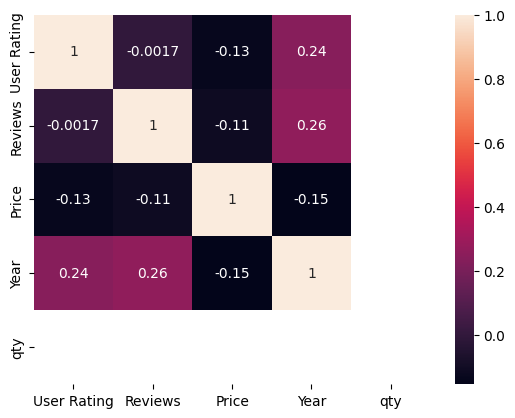

In [9]:
sns.heatmap(df.corr(), annot=True)

Tidak ada korelasi antar variabel.

##Mencari Top Authors by User Rating

In [10]:
top_author = df[df['User Rating'].values==4.9]
top_author = top_author.groupby('Author')[['User Rating']].mean().sort_values('User Rating', ascending=False).reset_index()
top_author

,Author,User Rating
0,Alice Schertle,4.9
1,Bill Martin Jr.,4.9
2,Sarah Young,4.9
3,Rush Limbaugh,4.9
4,Pete Souza,4.9
5,Patrick Thorpe,4.9
6,Nathan W. Pyle,4.9
7,Mark R. Levin,4.9
8,Lin-Manuel Miranda,4.9
9,Jill Twiss,4.9


##Mencari buku yang banyak direview

In [11]:
most_reviews = df[df['Reviews'].values > 50000]
most_reviews = most_reviews.groupby('Name')[['Reviews']].mean().sort_values('Reviews', ascending=False).reset_index()
most_reviews

,Name,Reviews
0,Where the Crawdads Sing,87841.0
1,The Girl on the Train,79446.0
2,Becoming,61133.0
3,Gone Girl,57271.0
4,The Fault in Our Stars,50482.0


##Mencari buku yang sedikit direview

In [12]:
lit_reviews = df[df['Reviews'].values < 1000]
lit_reviews = lit_reviews.groupby('Name')[['Reviews']].mean().sort_values('Reviews', ascending=True).reset_index()
lit_reviews

,Name,Reviews
0,Divine Soul Mind Body Healing and Transmission...,37.0
1,Soul Healing Miracles: Ancient and New Sacred ...,220.0
2,George Washington's Sacred Fire,408.0
3,True Compass: A Memoir,438.0
4,The Daily Show with Jon Stewart Presents Earth...,440.0
5,A Patriot's History of the United States: From...,460.0
6,"Broke: The Plan to Restore Our Trust, Truth an...",471.0
7,"Autobiography of Mark Twain, Vol. 1",491.0
8,Percy Jackson and the Olympians Paperback Boxe...,548.0
9,"Barefoot Contessa, How Easy Is That?: Fabulous...",615.0


##Melihat Rata-rata Rating dari Genre Fiction dan Non Fiction

In [13]:
genre = df[df['User Rating'].values >= 0]
genre = genre.groupby('Genre')[['User Rating']].mean().sort_values('User Rating', ascending=False).reset_index()
genre

,Genre,User Rating
0,Fiction,4.648333
1,Non Fiction,4.595161


##Melihat Rata-rata Reviews dari Genre Fiction dan Non Fiction

In [14]:
reviews = df[df['Reviews'].values >= 0]
reviews = reviews.groupby('Genre')[['Reviews']].mean().sort_values('Reviews', ascending=False).reset_index()
reviews

,Genre,Reviews
0,Fiction,15683.791667
1,Non Fiction,9065.145161


##Melihat User Rating Data Fiction dan Jumlah Datanya

In [15]:
filter_fiction = df[(df.Genre == 'Fiction')]
filter_fiction

,Name,Author,User Rating,Reviews,Price,Year,Genre,qty
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,1
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction,1
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction,1
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction,1
...,...,...,...,...,...,...,...,...
541,Wonder,R. J. Palacio,4.8,21625,9,2014,Fiction,1
542,Wonder,R. J. Palacio,4.8,21625,9,2015,Fiction,1
543,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction,1
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction,1


##Melihat Data Non Fiction dan Jumlah Datanya

In [16]:
filter_non_fiction = df[(df.Genre == 'Non Fiction')]
filter_non_fiction

,Name,Author,User Rating,Reviews,Price,Year,Genre,qty
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,1
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,1
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,1
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction,1
11,A Patriot's History of the United States: From...,Larry Schweikart,4.6,460,2,2010,Non Fiction,1
...,...,...,...,...,...,...,...,...
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction,1
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction,1
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction,1
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction,1


<Axes: xlabel='Genre', ylabel='User Rating'>

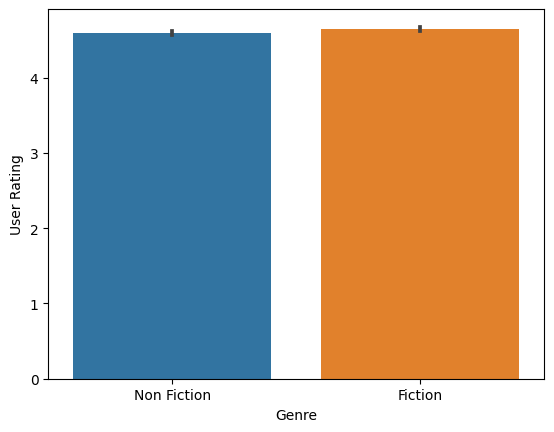

In [17]:
import seaborn as sns

sns.barplot(x='Genre', y='User Rating', data=df)

<Axes: xlabel='Genre', ylabel='Reviews'>

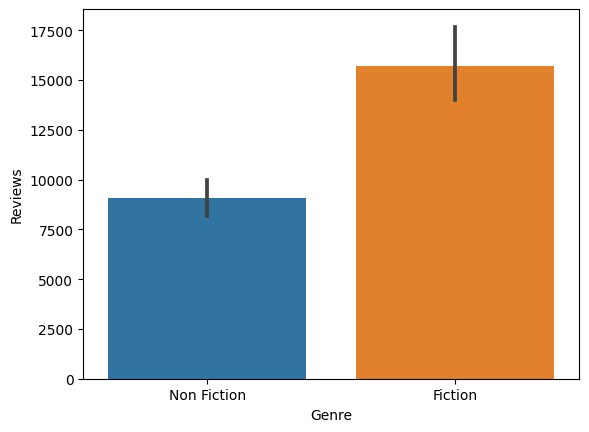

In [18]:
sns.barplot(x='Genre', y='Reviews', data=df)

##Melihat Data Buku per Tahun

In [19]:
year = ['Year']
for book in year:
  print(df[book].value_counts())

2016    50
2011    50
2018    50
2017    50
2019    50
2014    50
2010    50
2009    50
2015    50
2013    50
2012    50
Name: Year, dtype: int64
